**add some file from github**

In [1]:
!git clone https://github.com/guptavasu1213/Yolo-Vehicle-Counter

Cloning into 'Yolo-Vehicle-Counter'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 123 (delta 17), reused 16 (delta 16), pack-reused 102
Receiving objects: 100% (123/123), 39.90 MiB | 40.37 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r /content/Yolo-Vehicle-Counter/ /content/drive/MyDrive/vehicle_detection

**get yolo3v.weights**

In [ ]:
!wget -P /content/drive/MyDrive/vehicle_detection/Yolo-Vehicle-Counter/yolo-coco/ https://pjreddie.com/media/files/yolov3.weights

**code**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
import os
from google.colab.patches import cv2_imshow
import imutils
import tensorflow as tf
import tensorflow.keras.backend as K

In [5]:
label_path = "/content/drive/MyDrive/vehicle_detection/Yolo-Vehicle-Counter/yolo-coco/coco.names"

#handle label path
LABELS = open(label_path).read().strip().split("\n")
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),dtype="uint8")

#handle weight path
weightsPath = "/content/drive/MyDrive/vehicle_detection/Yolo-Vehicle-Counter/yolo-coco/yolov3.weights"


#handle config_path
configPath = "/content/drive/MyDrive/vehicle_detection/Yolo-Vehicle-Counter/yolo-coco/yolov3.cfg"

YOLOnet = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

**images_processing**

In [6]:
ln = YOLOnet.getLayerNames()
ln = [ln[i[0] - 1] for i in YOLOnet.getUnconnectedOutLayers()]

In [7]:
ln

['yolo_82', 'yolo_94', 'yolo_106']

In [8]:
vehicle_class_name = ["car","bus","motorbike","truck","bicycle"]

LABELS = open("/content/drive/MyDrive/vehicle_detection/Yolo-Vehicle-Counter/yolo-coco/coco.names").read().strip().split("\n")

In [9]:
def displayVehicleCount(frame, object_count):
    return cv2.putText(
      frame, #Image
      'Detected object: ' + str(object_count), #Label
      (20, 20), #Position
      cv2.FONT_HERSHEY_SIMPLEX, #Font
      0.8, #Size
      (0, 0xFF, 0), #Color
      2, #Thickness
      cv2.FONT_HERSHEY_COMPLEX_SMALL,
      )

In [10]:
image_path = "/content/drive/MyDrive/vehicle_detection/Image/hqdefault.jpg"

image = cv2.imread(image_path)
(H, W) = image.shape[:2]

blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
	swapRB=True, crop=False)
YOLOnet.setInput(blob)
start = time.time()
layerOutputs = YOLOnet.forward(ln)
end = time.time()
# show timing information on YOLO
print("[INFO] YOLO took {:.6f} seconds".format(end - start))

[INFO] YOLO took 2.513777 seconds


In [11]:
boxes = []
confidences = []
classIDs = []

for output in layerOutputs:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        label = LABELS[classID]

        if confidence > 0.5 and label in vehicle_class_name:
            box = detection[0:4] * np.array([W, H, W, H])
            centerX, centerY, width, height = box.astype("int")

            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

In [12]:
def _extract_vehicle(image, bbox, v_scale_thres = (20, 20)):
      h, w = image.shape[:2]
      try:
        (x, y, w, h) = bbox
      except:
        return None
      (x, y), (x + w, y + h)
      vehicle = image[y:(y+h), x:(x+w)].copy()
      # extract the face ROI and grab the ROI dimensions
      (fH, fW) = vehicle.shape[:2]
      # ensure the face width and height are sufficiently large
      if fW < v_scale_thres[0] or fH < v_scale_thres[1]:
        return None
      else:
        return vehicle

In [13]:
lst_image = []
idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)
if len(idxs) > 0:X
   for i in idxs.flatten():
        vec = _extract_vehicle(image,boxes[i])
        if vec is not None:
            lst_image.append(vec)

In [16]:
def get_lst_vehicle_image(image,mode=1):
    if mode == 0:
      image = cv2.imread(image_path)
    (H, W) = image.shape[:2]

    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
      swapRB=True, crop=False)
    YOLOnet.setInput(blob)
    layerOutputs = YOLOnet.forward(ln)

    boxes = []
    confidences = []
    classIDs = []

    for output in layerOutputs:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
            label = LABELS[classID]

            if confidence > 0.5 and label in vehicle_class_name:
                box = detection[0:4] * np.array([W, H, W, H])
                centerX, centerY, width, height = box.astype("int")

                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)
    lst_image = []
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)
    if len(idxs) > 0:
      for i in idxs.flatten():
            vec = _extract_vehicle(image,boxes[i])
            if vec is not None:
                lst_image.append(vec)
    return lst_image

In [17]:
lst_image = get_lst_vehicle_image("/content/drive/MyDrive/vehicle_detection/Image/hqdefault.jpg",0)

In [22]:
cv2.resize(lst_image[1],(128,128)).shape

(128, 128, 3)

In [24]:
print(len(lst_image))

33


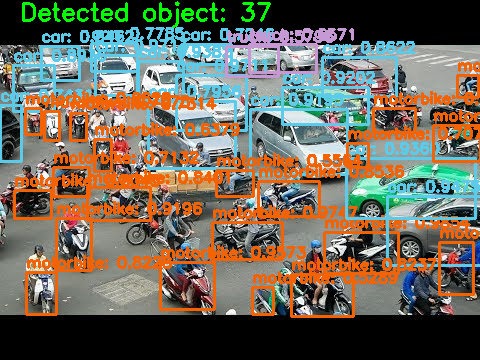

-1

In [23]:
idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)
objectcount = 0
if len(idxs) > 0:
	for i in idxs.flatten():
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])
		color = [int(c) for c in COLORS[classIDs[i]]]
		cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
		text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
		cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, color, 2)
		objectcount += 1

displayVehicleCount(image, objectcount)
cv2_imshow(image)
cv2.waitKey(0)

**load similarity module**

In [29]:
model = tf.keras.models.load_model('/content/drive/MyDrive/vehicle_detection/checkpoint')

In [36]:
def predict_similarity(image1_path,image2_path,mode = 1):
    def _image_read(image_path):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image
    if mode == 0:
       imageA = _image_read(image1_path)
       imageB = _image_read(image2_path)
    else:
       imageA = image1_path
       imageB = image2_path

    imageA = cv2.resize(imageA, (128,128))
    imageB = cv2.resize(imageB, (128,128))
    
    
    imageA = np.expand_dims(imageA, axis=0)
    imageB = np.expand_dims(imageB, axis=0)

    imageA = imageA / 255.0
    imageB = imageB / 255.0
    
    preds = model.predict([imageA, imageB])
    proba = preds[0][0]

    return proba

**MAIN**

In [50]:
vs = cv2.VideoCapture("/content/drive/MyDrive/vehicle_detection/istockphoto-543255860-640_adpp_is.mp4")
(W, H) = (None, None)
writer = None

prop = cv2.cv.CV_CAP_PROP_FRAME_COUNT if imutils.is_cv2() \
else cv2.CAP_PROP_FRAME_COUNT
total = int(vs.get(prop))
print("[INFO] {} total frames in video".format(total))

[INFO] 713 total frames in video


In [51]:
start1 = time.time()
stone = 30

while True:
    (grabbed, frame) = vs.read()
    save = frame.copy()
    if not grabbed:
		   break
    if W is None or H is None:
		   (H, W) = frame.shape[:2]

    blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416),
		swapRB=True, crop=False) 

    YOLOnet.setInput(blob)
    start = time.time()
    layerOutputs = YOLOnet.forward(ln)
    end = time.time()
    
    boxes = []
    confidences = []
    classIDs = []

    for output in layerOutputs:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
            label = LABELS[classID]
            if confidence > 0.5 and label in vehicle_class_name:
                box = detection[0:4] * np.array([W, H, W, H])
                centerX, centerY, width, height = box.astype("int")

                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.9, 0.3)
    object_count = 0
    if len(idxs) > 0:
      for i in idxs.flatten():
        object_count += 1
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in COLORS[classIDs[i]]]
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
        cv2.putText(frame, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
          0.5, color, 2)
    displayVehicleCount(frame, object_count)


    if object_count >= 30:
       print("====sync traffic====!!")
       break

    end1 = time.time()
    time_progress = end1 - start1
    flag_process = False
    if time_progress < 2:
      #save
      save_for_progress = save.copy()
    if time_progress >= stone:
       print(time_progress)
       end_image = get_lst_vehicle_image(save)
       start_image = get_lst_vehicle_image(save_for_progress)

       count_process = 0
       for s_img in start_image:
          for e_img in end_image:
              if predict_similarity(s_img,e_img) <= 0.3:
                  count_process += 1
                  break
       print("object_match",count_process)
       if count_process >= 20:
          flag_process = True
       save_for_progress = save.copy()
       stone = stone + 40
    if flag_process == True:
       print("====sync traffic====!!")
       break


    if writer is None:
        fourcc = cv2.VideoWriter_fourcc(*"mp4v")
        writer = cv2.VideoWriter('/content/drive/MyDrive/vehicle_detection/video1.mp4', fourcc, 30,(frame.shape[1],frame.shape[0]), True)

        if total > 0:
           elap = (end - start)
           print("[INFO] single frame took {:.4f} seconds".format(elap))
           print("[INFO] estimated total time to finish: {:.4f}".format(elap * total))

    writer.write(frame)
print("[INFO] cleaning up...")
writer.release()
vs.release()

[INFO] single frame took 1.7309 seconds
[INFO] estimated total time to finish: 1234.1317
31.56010603904724
object_match 2
70.32495427131653
object_match 21
====sync traffic====!!
[INFO] cleaning up...


**Streaming**